<a href="https://colab.research.google.com/github/ashishkumar11125/Project/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df =pd.read_csv('/content/stock_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [ ]:
df.shape

(19586, 8)

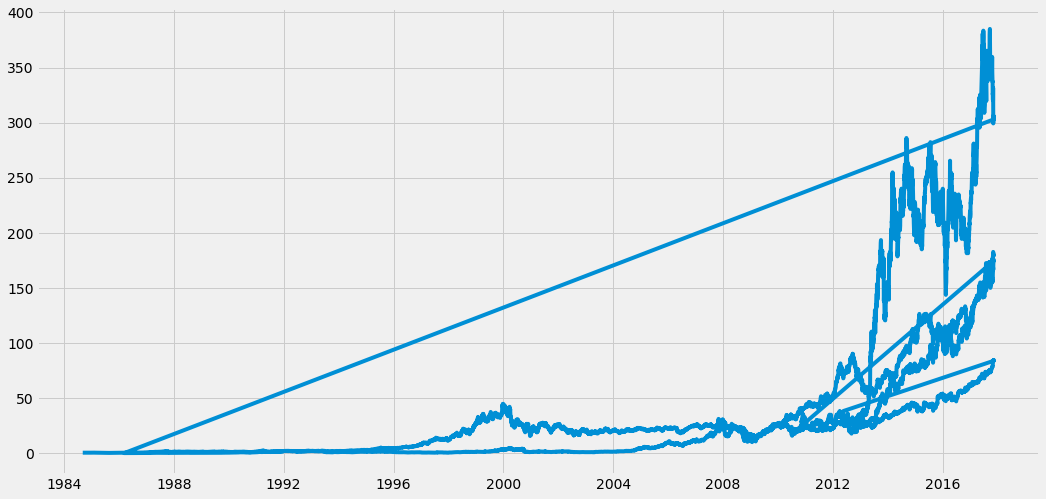

In [ ]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [ ]:
data =df.filter(['Close'])
dataset =data.values
training_data_len =math.ceil( len(dataset)* .8)
training_data_len

15669

In [ ]:
scaler =MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)

scaled_data

array([[0.0009266 ],
       [0.00092   ],
       [0.00093996],
       ...,
       [0.46629645],
       [0.46562101],
       [0.46343881]])

In [ ]:
train_data =scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
   x_train.append(train_data[i-60:i, 0])
   y_train.append(train_data[i, 0])
   if i<= 60:
     print(x_train)
     print(y_train)
     print()

[array([0.0009266 , 0.00092   , 0.00093996, 0.0009066 , 0.00096658,
       0.00098318, 0.00101311, 0.00096983, 0.00094658, 0.00094993,
       0.00093996, 0.00092993, 0.0009066 , 0.00089343, 0.00089343,
       0.00086667, 0.00084342, 0.0008501 , 0.00086667, 0.00087997,
       0.00085675, 0.00085675, 0.0008468 , 0.00081687, 0.00081017,
       0.00076691, 0.00082012, 0.00081687, 0.00085675, 0.00088673,
       0.00088673, 0.00087997, 0.0009033 , 0.00091325, 0.00087337,
       0.0008468 , 0.0008501 , 0.00086342, 0.00085675, 0.00086342,
       0.00085675, 0.0008501 , 0.00091325, 0.00089343, 0.0008501 ,
       0.00079022, 0.00082349, 0.00080019, 0.00081017, 0.00081017,
       0.00079022, 0.00073369, 0.00076356, 0.00078359, 0.00081017,
       0.00082012, 0.0008468 , 0.00090005, 0.00087997, 0.0008501 ])]
[0.0008368213880448744]



In [ ]:
x_train, y_train =np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(15609, 60, 1)

In [ ]:
model =Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

15609/15609 [==============================] - 618s 39ms/step - loss: 5.7062e-04


In [ ]:
test_data = scaled_data[training_data_len -60: , : ]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions =model.predict(x_test)
predictions =scaler.inverse_transform(predictions)

123/123 [==============================] - 3s 18ms/step


In [ ]:
rmse =np.sqrt( np.mean(predictions -y_test )**2)
rmse

0.9235471321477983

<ipython-input-20-a2893d84f3a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


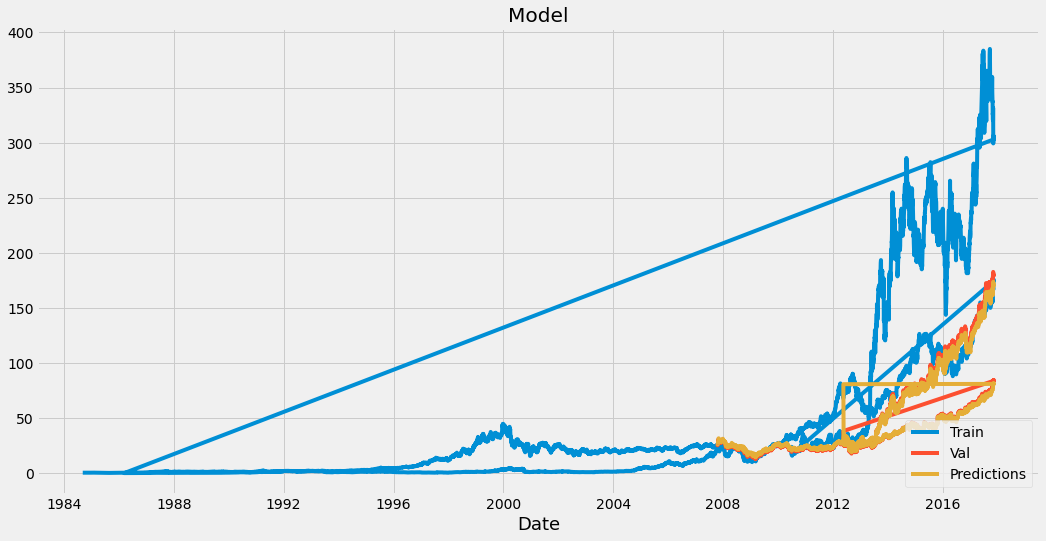

In [ ]:
train =data[:training_data_len]
valid =data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right' )
plt.show()


In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2007-10-18,26.131,26.890358
2007-10-19,25.301,26.978611
2007-10-22,25.586,26.123642
2007-10-23,25.912,26.331659
2007-10-24,26.205,26.698381
...,...,...
2017-11-06,180.170,169.390472
2017-11-07,180.250,170.888916
2017-11-08,179.560,171.090149


In [ ]:
 #Get the quote
#apple_quote=web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
#new_df =apple_quote.filter(['Close'])
last_60_days =new_df[-60].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price =model.predict(X_test)
pred_price =scaler.inverse_transform(pred_price)
print(pred_price)

NameError: ignored